## Лабораторная 4: восстановление плотности распределения

Данными в этом задании являются измерения некоторых проверочных параметров на конвейерах  сборки оборудования Bosh (см. [конкурс](https://www.kaggle.com/c/bosch-production-line-performance) «Bosch Production Line Performance» на Kaggle). 

Все исходные данные Bosh не помещаются в оперативную память компьютера, поэтому в файле `data.csv` — лишь некоторые признаки. Прочтите данные из файла `data.csv`. Целевым признаком здесь является `Response` — наличие брака в оборудовании. 

In [72]:
import pandas as pd

In [73]:
# место для кода
data = pd.read_csv('data.csv', delimiter=',')

In [74]:
data

,L1_S24_F1844,L1_S24_F1846,Response
0,-0.123,0.111,0
1,-0.269,0.175,0
2,-0.058,0.141,0
3,0.136,-0.145,0
4,0.045,-0.094,0
...,...,...,...
54724,0.145,-0.159,0
54725,-0.233,0.189,0
54726,0.013,0.134,0
54727,0.097,-0.155,0


## 1 
Постройте на одном графике два приближения к плотности распределения признака `L1_S24_F1846` для `Response = 0` и для `Response = 1`, используя одно из следующих ядер (номер ядра выберите по формуле: `(n mod 6) + 1`, где `n` — ваш номер в списке группы):

    1.	кусочно-постоянное (прямоугольное) -  tophat
    2.	гауссовское -  gaussian
    3.	линейное (треугольник) -  linear
    4.	косинусоидальное -  cosine
    5.	квадратичное (Епанечникова) -  epanechnikov
    6.	экспоненциальное -  exponential


In [85]:
# я в списке группы нахожусь под номером 19

In [75]:
from sklearn.neighbors import KernelDensity
import numpy as np

import matplotlib.pyplot as plt

*Help:*

    i0 = data['Response'] == 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))
    X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
    Dens0 = np.exp(kde0.score_samples(X_plot))  # score_samples возвращает логарифм плотности

In [76]:
# место для кода
i0 = data['Response'] == 0
kde0 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))
X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
Dens0 = np.exp(kde0.score_samples(X_plot))

In [77]:
i1 = data['Response'] == 1
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i1, 'L1_S24_F1846'].values.reshape(-1, 1))
X1_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
Dens1 = np.exp(kde1.score_samples(X_plot))

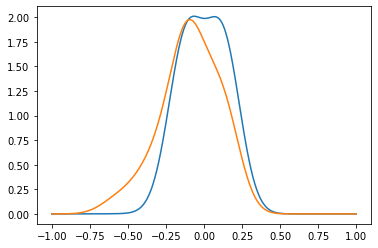

In [78]:
fig, ax = plt.subplots()
ax.plot(X_plot, Dens0)
ax.plot(X1_plot, Dens1)

Ответьте в комментариях на вопрос: является ли выборка хорошо разделимой по признаку  `L1_S24_F1846`?

In [ ]:
# место для комментария
# Нет, поскольку имеется пересечение графиков

## 2

Разбейте выборку `data` на две равные части: тренировочную `dataTrain` и проверочную `dataTest`. 

In [79]:
dataTrain = data.loc[0:data.shape[0] / 2, ].reset_index(drop=True)
dataTest = data.loc[data.shape[0] / 2:data.shape[0], ].reset_index(drop=True)

Пользуясь кросс-валидацией, подберите **для каждого класса `Response` (`r=0` и `r=1`)** значение ширины ядра `bandwidth`, при котором логарифм правдоподобия максимален на проверочной выборке.

*Help:*

    r = 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.05)
    kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
    logLikehood0 = logProbability0.sum()
    print(logLikehood0)

In [80]:
# место для кода
def func(r, number):
    kde0 = KernelDensity(kernel='gaussian', bandwidth=number)
    kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
    logLikehood0 = logProbability0.sum()
    return(logLikehood0)

In [98]:
kd_0 = func(0, 0.05)
print(kd_0)

20544.807461121214


In [89]:
kd_1 = func(1, 0.05)
print(kd_1)

103.98787944779147


In [ ]:
# Выше показаны результаты для ширины ядра bandwidth = 0.05
# Найдем наилучший результат logLikehood, подобрав наилучшее значение ширины ядра bandwith

In [99]:
number = 0.01
numberResult
result = kd_0
while number <=0.05:
    a0 = func(0, number)
    if(a0 >= result):
        result = a0
        numberResult = number
    number += 0.01
print (numberResult, result)

0.01 22283.599548868024


In [83]:
number1 = 0.01
numberResult1
result1 = kd_1
while number1 <=1:
    a1 = func(1, number1)
    if(a1 >= result1):
        result1 = a1
        numberResult1 = number1
    number1 = number1 + 0.0001
print (numberResult1, result1)

0.02039999999999994 114.41541284242972


In [101]:
r = 0
kde0 = KernelDensity(kernel='gaussian', bandwidth=numberResult)
kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
logLikehood0 = logProbability0.sum()
print(logLikehood0)

22283.599548868024


In [84]:
r = 1
kde0 = KernelDensity(kernel='gaussian', bandwidth=numberResult1)
kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
logLikehood0 = logProbability0.sum()
print(logLikehood0)

114.41541284242972


### 3

Для найденных наилучших `bandwidth` вычислите `p(x|0)` и `p(x|1)` для тестовой выборки. 

In [103]:
predictionProbXafter0 = np.exp(kde0.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))
predictionProbXafter1 = np.exp(kde1.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))

По формуле Байеса найдите затем `p(0|x)` и `p(1|x)`. Отсортируйте все объекты тестовой выборки по возрастанию предсказанной вероятности `p(1|x)`, выведите на экран вероятности для последних 10 объектов и рассчитайте количество бракованных деталей среди последних 100 объектов в отсортированном ряду.

*Help:*
    
    ind = np.argsort(predictionProb1afterX) - сортировка, возвращающая индексы элементов
    print(predictionProb1afterX[ind[-10:]]) - вывод последних 10 элементов
    print(sum(dataTest.loc[ind[-100:],'Response'])) - количество бракованных среди 100 с максимальной вероятностью брака

In [107]:
predictionProb0afterX = predictionProbXafter0 * len(dataTrain[dataTrain['Response']==0])/len(dataTrain[dataTrain['Response']==1])
print(predictionProb0afterX)

[147.877318   276.07444234 320.15052077 ... 325.80209791 255.06949856
 350.66996574]


In [108]:
predictionProb1afterX = predictionProbXafter1 * len(dataTrain[dataTrain['Response']==1])/len(dataTrain[dataTrain['Response']==0])
print(predictionProb1afterX)

[0.01709405 0.01203026 0.01313075 ... 0.0136099  0.0197436  0.02110112]


In [109]:
# место для кода
ind = np.argsort(predictionProb1afterX)

In [110]:
print(predictionProb1afterX[ind[-10:]])

[0.02131568 0.02131568 0.02131568 0.02131568 0.02131568 0.02131568
 0.02131568 0.02131568 0.02131568 0.02131568]


In [111]:
print(sum(dataTest.loc[ind[-100:],'Response']))

2
